# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [41]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

BRIEFLY EXPLAIN HOW YOU SOLVE THE MODEL.

In [56]:
# code for solving the model (remember documentation and comments)

#a = np.array([1,2,3])
#b = inauguralproject.square(a)
#print(b)

# til en start prøver jeg at lave det med fixet løn
import numpy as np
import math
from scipy import optimize
def u_func(l, w, epsilon, m=1, nu=10, tau0=0.4, tau1=0.1, kappa=0.4):
    return math.log10( m+w*l-(tau0*w*l+tau1*max(w*l-kappa,0)) ) - nu*l**(1+1/epsilon)/(1+1/epsilon)

epsilon = 0.3
w=1

# modificeret kode fra 3. forelæsning
# a. objective funciton (to minimize)
def value_of_choice(l,w,epsilon):
    return -u_func(l,w,epsilon)

# b. call solver
sol_case1 = optimize.minimize_scalar(
    value_of_choice,method='bounded',
    bounds=(0,1),args=(w,epsilon))

# c. unpack solution
l = sol_case1.x
u = u_func(l,w,epsilon)
print(l)
print(u)

0.31772191243090864
0.059731396195159006


# Question 2

ADD ANSWER.

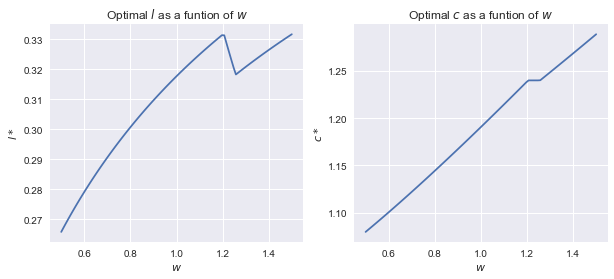

In [57]:
#modificeret kode fra problem set 1
N = 100
w_vec = np.linspace(0.5,1.5,N)
l_vec = np.empty(N)
u_vec = np.empty(N)
c_vec = np.empty(N)

def c_func(l, w, epsilon, m=1, tau0=0.4, tau1=0.1, kappa=0.4):
    return m+w*l-(tau0*w*l+tau1*max(w*l-kappa,0)) 

for i,w in enumerate(w_vec):
    w = w_vec[i]
    sol_case1 = optimize.minimize_scalar(value_of_choice,method='bounded',bounds=(0,1),args=(w,epsilon))
    l_vec[i] = sol_case1.x
    l=l_vec[i]
    c_vec[i] = c_func(l,w,epsilon)

# Laver figuren
import matplotlib.pyplot as plt
plt.style.use("seaborn")

fig = plt.figure(figsize=(10,4))

fig_w_l = fig.add_subplot(1,2,1)
fig_w_l.plot(w_vec,l_vec)

fig_w_l.set_title('Optimal $l$ as a funtion of $w$')
fig_w_l.set_xlabel('$w$')
fig_w_l.set_ylabel('$l*$')
fig_w_l.grid(True)

fig_w_c = fig.add_subplot(1,2,2)
fig_w_c.plot(w_vec,c_vec)

fig_w_c.set_title('Optimal $c$ as a funtion of $w$')
fig_w_c.set_xlabel('$w$')
fig_w_c.set_ylabel('$c*$')
fig_w_c.grid(True)

# Question 3

ADD ANSWER.

In [58]:
np.random.seed(42)
N2 = 10000
w_vec2 = np.random.uniform(0.5,1.5,N2)
l_vec2 = np.empty(N2)
t_vec = np.empty(N2)

def t_func(l, w, epsilon, m=1, tau0=0.4, tau1=0.1, kappa=0.4):
    return tau0*w*l+tau1*max(w*l-kappa,0)

def tax_rev():
    for i,w in enumerate(w_vec2):
        w = w_vec2[i]
        sol_case1 = optimize.minimize_scalar(value_of_choice,method='bounded',bounds=(0,1),args=(w,epsilon))
        l_vec2[i] = sol_case1.x
        l=l_vec2[i]
        t_vec[i] = t_func(l,w,epsilon)
    return sum(t_vec)

print(tax_rev())

1262.3356373191796


# Question 4

ADD ANSWER.

In [59]:
epsilon = 0.1
print(tax_rev())

2900.1830976856077


# Question 5

ADD ANSWER.

In [60]:
# code

# Conclusion

ADD CONCISE CONLUSION.